In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
train = pd.read_csv("train_preprocessed.csv", sep='\t', index_col=0)
train

,indicator,er-cv,leukocyty,trombocyty,hemoglobin,ast,hematokrit
0,1.0,0.166667,0.401497,0.551966,0.742755,0.111111,0.322113
1,0.0,0.405000,0.525788,0.850466,0.096399,0.467167,0.767291
2,1.0,0.166667,0.812344,0.127427,0.278961,0.111111,0.213721
3,0.0,0.698214,0.787698,0.455711,0.888889,0.422187,0.512109
4,0.0,0.408464,0.944378,0.369594,0.128604,0.111111,0.255717
...,...,...,...,...,...,...,...
7411,0.0,0.166667,0.078640,0.755602,0.278672,0.833333,0.980660
7412,1.0,0.833333,0.341716,0.792409,0.375579,0.833333,0.617682
7413,1.0,0.570789,0.511191,0.041743,0.472727,0.833333,0.130750
7414,1.0,0.336835,0.587366,0.141449,0.701149,0.501854,0.214179


In [3]:
X_train = train[['er-cv','leukocyty','trombocyty','hemoglobin','ast','hematokrit']]
y_train = train[['indicator']]

In [4]:
test = pd.read_csv("test_preprocessed.csv", sep='\t', index_col=0)
test

,indicator,er-cv,leukocyty,trombocyty,hemoglobin,ast,hematokrit
0,1.0,0.665906,0.100535,0.670131,0.188402,0.774156,0.854971
1,1.0,0.431031,0.292957,0.505078,0.574594,0.519243,0.138992
2,0.0,0.833333,0.927602,0.804264,0.888889,0.888889,0.344746
3,0.0,0.166667,0.494079,0.837628,0.298132,0.111111,0.832973
4,0.0,0.326503,0.585516,0.378796,0.506597,0.460350,0.743430
...,...,...,...,...,...,...,...
2467,0.0,0.596222,0.650872,0.252858,0.504795,0.484935,0.560478
2468,0.0,0.166667,0.338466,0.468159,0.448032,0.247005,0.344596
2469,1.0,0.726931,0.265893,0.137857,0.404205,0.333889,0.602692
2470,0.0,0.166667,0.902223,0.515914,0.573236,0.463605,0.353606


In [5]:
X_test = test[['er-cv','leukocyty','trombocyty','hemoglobin','ast','hematokrit']]
y_test = test[['indicator']]

In [6]:
X_train

,er-cv,leukocyty,trombocyty,hemoglobin,ast,hematokrit
0,0.166667,0.401497,0.551966,0.742755,0.111111,0.322113
1,0.405000,0.525788,0.850466,0.096399,0.467167,0.767291
2,0.166667,0.812344,0.127427,0.278961,0.111111,0.213721
3,0.698214,0.787698,0.455711,0.888889,0.422187,0.512109
4,0.408464,0.944378,0.369594,0.128604,0.111111,0.255717
...,...,...,...,...,...,...
7411,0.166667,0.078640,0.755602,0.278672,0.833333,0.980660
7412,0.833333,0.341716,0.792409,0.375579,0.833333,0.617682
7413,0.570789,0.511191,0.041743,0.472727,0.833333,0.130750
7414,0.336835,0.587366,0.141449,0.701149,0.501854,0.214179


In [7]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree

# 2. Natrénovanie strojového učenia - stromový algoritmus
Vytvorenie funkcie pre natrénovanie a následné otestovanie algoritmu decision tree

In [8]:
def predict_tree(i):
    if (i == 0):
        clf = DecisionTreeClassifier()
    else:
        print("Depth = ",i)
        clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    rec = recall_score(y_test, pred)
    prec= precision_score(y_test, pred)
    print("Accuracy = ",acc," Precision = ",prec," Recall = ",rec)
    return clf

In [9]:
strom = predict_tree(0)

Accuracy =  0.8236245954692557  Precision =  0.8555276381909548  Recall =  0.8686224489795918


Ako vidíme strom má presnosť 82% a zvyšné metriky Precision a Recall okolo 86%

In [10]:
strom.tree_.max_depth

26

Strom má hĺbku 26 a pri vizualizácií vidíme, že pri aktuálnej veľkosti je veľmi neprehľadný

[Text(286.5736635350875, 640.24, 'X[1] <= 0.381\ngini = 0.458\nsamples = 7416\nvalue = [2627, 4789]'),
 Text(148.8590670900538, 616.08, 'X[5] <= 0.926\ngini = 0.188\nsamples = 2868\nvalue = [301, 2567]'),
 Text(102.9121537327836, 591.9200000000001, 'X[1] <= 0.352\ngini = 0.122\nsamples = 2412\nvalue = [157, 2255]'),
 Text(68.88155925754523, 567.76, 'X[3] <= 0.0\ngini = 0.1\nsamples = 2223\nvalue = [117, 2106]'),
 Text(67.98008728497578, 543.6, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(69.7830312301147, 543.6, 'X[3] <= 0.809\ngini = 0.099\nsamples = 2222\nvalue = [116, 2106]'),
 Text(32.34371834785672, 519.44, 'X[5] <= 0.36\ngini = 0.086\nsamples = 1937\nvalue = [87, 1850]'),
 Text(5.8595678217014715, 495.2800000000001, 'X[0] <= 0.087\ngini = 0.038\nsamples = 518\nvalue = [10, 508]'),
 Text(2.7044159177083715, 471.12000000000006, 'X[0] <= 0.086\ngini = 0.147\nsamples = 25\nvalue = [2, 23]'),
 Text(1.8029439451389144, 446.96000000000004, 'X[0] <= 0.073\ngini = 0.08\nsamples = 24\

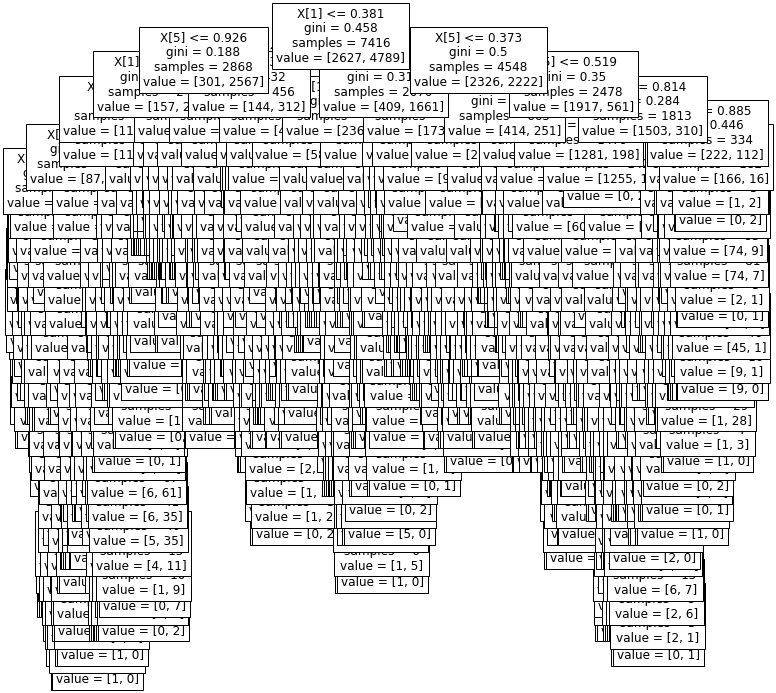

In [11]:
plt.figure(figsize=(12,12))
tree.plot_tree(strom,fontsize = 12)

# 3. Hyperparameter tuning

1. max_depth = limituje hĺbku maximálnou hodnotou
2. min_samples_leaf = minimálny počet samplov na 1 liste
3. max_leaf_nodes = maximálny konečný počet listov
4. max_features = určuje počet parametrov ktoré sa náhodne vyberú a použijú pri rozdelovaní

In [12]:
lst = []
for i in range(1,30):
    lst.append(predict_tree(i))

Depth =  1
Accuracy =  0.6678802588996764  Precision =  0.890282131661442  Recall =  0.5433673469387755
Depth =  2
Accuracy =  0.8305016181229773  Precision =  0.8496652465003043  Recall =  0.8903061224489796
Depth =  3
Accuracy =  0.8543689320388349  Precision =  0.8886743886743886  Recall =  0.8807397959183674
Depth =  4
Accuracy =  0.8543689320388349  Precision =  0.8856960408684547  Recall =  0.8845663265306123
Depth =  5
Accuracy =  0.8559870550161812  Precision =  0.8594306049822064  Recall =  0.9241071428571429
Depth =  6
Accuracy =  0.8499190938511327  Precision =  0.8522660388463802  Recall =  0.923469387755102
Depth =  7
Accuracy =  0.863673139158576  Precision =  0.8883280757097792  Recall =  0.8979591836734694
Depth =  8
Accuracy =  0.8644822006472492  Precision =  0.889943074003795  Recall =  0.8973214285714286
Depth =  9
Accuracy =  0.8563915857605178  Precision =  0.8700427089688835  Recall =  0.9094387755102041
Depth =  10
Accuracy =  0.8559870550161812  Precision =  0.

Najlepšie vyšla presnosť hĺbkam medzi 3 a 10, pri čom, najlepšia bola hĺbka = 8
Najlepší precision bol v hĺbkach 1,3,7,8 a najlepší recall v 5,6,7,8
Teda pri skúšaní ďaľších parametrov sa budeme sústrediť na hĺbku od 3 po 8
Ďalej sa pozrieme na parameter min_samples_leaf ktorý určuje minimálny počet vzorky na liste

In [13]:
def predict_tree_MinSample(i,j):
    print("Depth = ",i," Min sample leaf = ",j)
    clf = DecisionTreeClassifier(max_depth = i,min_samples_leaf = j)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    rec = recall_score(y_test, pred)
    prec= precision_score(y_test, pred)
    print("Accuracy = ",acc," Precision = ",prec," Recall = ",rec)
    return clf

In [14]:
for j in range (1,400,50):
    for i in range(3,9):
        predict_tree_MinSample(i,j)

Depth =  3  Min sample leaf =  1
Accuracy =  0.8543689320388349  Precision =  0.8886743886743886  Recall =  0.8807397959183674
Depth =  4  Min sample leaf =  1
Accuracy =  0.8543689320388349  Precision =  0.8856960408684547  Recall =  0.8845663265306123
Depth =  5  Min sample leaf =  1
Accuracy =  0.8559870550161812  Precision =  0.8594306049822064  Recall =  0.9241071428571429
Depth =  6  Min sample leaf =  1
Accuracy =  0.8495145631067961  Precision =  0.851764705882353  Recall =  0.923469387755102
Depth =  7  Min sample leaf =  1
Accuracy =  0.8632686084142395  Precision =  0.8877679697351829  Recall =  0.8979591836734694
Depth =  8  Min sample leaf =  1
Accuracy =  0.8644822006472492  Precision =  0.8894504106127605  Recall =  0.8979591836734694
Depth =  3  Min sample leaf =  51
Accuracy =  0.8543689320388349  Precision =  0.8886743886743886  Recall =  0.8807397959183674
Depth =  4  Min sample leaf =  51
Accuracy =  0.8543689320388349  Precision =  0.8886743886743886  Recall =  0.8

Pri kombinácii maximálnej hĺbky 8 a minimálneho počtu samplov 51 bola maximálna presnosť 86,9% zatiaľ najvyššia dosiahnutá
Ako ďaľšie vyskúšame skombinovať viaceré parametre ako max_lead a min_samples

In [15]:
def predict_tree_MaxLeaf(i,j,acc_arr,k,l):
    print("Min Samples = ",i," Max leaf = ",j)
    clf = DecisionTreeClassifier(max_leaf_nodes = j,min_samples_leaf = i,max_features = k,random_state = l)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    acc_arr.append(acc)
    rec = recall_score(y_test, pred)
    prec= precision_score(y_test, pred)
    print("Accuracy = ",acc," Precision = ",prec," Recall = ",rec)
    return clf

In [16]:
acc_arr = []
for j in range (30,71,10):
    for i in range(30,140,10):
        predict_tree_MaxLeaf(j,i,acc_arr,6,1)

Min Samples =  30  Max leaf =  30
Accuracy =  0.8733818770226537  Precision =  0.9004467134652202  Recall =  0.8998724489795918
Min Samples =  30  Max leaf =  40
Accuracy =  0.8681229773462783  Precision =  0.8866749688667497  Recall =  0.9081632653061225
Min Samples =  30  Max leaf =  50
Accuracy =  0.8677184466019418  Precision =  0.8846869187848729  Recall =  0.9100765306122449
Min Samples =  30  Max leaf =  60
Accuracy =  0.8677184466019418  Precision =  0.8846869187848729  Recall =  0.9100765306122449
Min Samples =  30  Max leaf =  70
Accuracy =  0.8648867313915858  Precision =  0.885625  Recall =  0.9036989795918368
Min Samples =  30  Max leaf =  80
Accuracy =  0.8648867313915858  Precision =  0.885625  Recall =  0.9036989795918368
Min Samples =  30  Max leaf =  90
Accuracy =  0.8648867313915858  Precision =  0.885625  Recall =  0.9036989795918368
Min Samples =  30  Max leaf =  100
Accuracy =  0.8648867313915858  Precision =  0.885625  Recall =  0.9036989795918368
Min Samples =  

In [17]:
index = acc_arr.index(max(acc_arr))
print("Acc = ",acc_arr[index], " index = ",index)

Acc =  0.8733818770226537  index =  0


V prípade pre minimálny počet samplov = 30 a maximálny počet listov = 30 je presnosť 87,33%, môžme skúsiť upresniť s parametrami max_features a random_state

In [18]:
# bezi zopar minut
acc_arr = []
lst_final = []
for j in range (25,35):
    for i in range (25,35):
        for k in range (1,7):
            for l in range (35,45):
                lst_final.append(predict_tree_MaxLeaf(j,i,acc_arr,k,l))

Min Samples =  25  Max leaf =  25
Accuracy =  0.7475728155339806  Precision =  0.7489451476793249  Recall =  0.9056122448979592
Min Samples =  25  Max leaf =  25
Accuracy =  0.7233009708737864  Precision =  0.7309299895506792  Recall =  0.892219387755102
Min Samples =  25  Max leaf =  25
Accuracy =  0.7103559870550162  Precision =  0.7762645914396887  Recall =  0.7633928571428571
Min Samples =  25  Max leaf =  25
Accuracy =  0.7629449838187702  Precision =  0.7573375262054507  Recall =  0.9215561224489796
Min Samples =  25  Max leaf =  25
Accuracy =  0.7682038834951457  Precision =  0.7506297229219143  Recall =  0.9502551020408163
Min Samples =  25  Max leaf =  25
Accuracy =  0.7686084142394822  Precision =  0.8081683168316832  Recall =  0.8329081632653061
Min Samples =  25  Max leaf =  25
Accuracy =  0.8207928802588996  Precision =  0.8444580526638089  Recall =  0.8794642857142857
Min Samples =  25  Max leaf =  25
Accuracy =  0.7512135922330098  Precision =  0.7509215376513955  Recall

In [19]:
index = acc_arr.index(max(acc_arr))
print("Acc = ",acc_arr[index], " index = ",index)
lst_final[index].get_params()

Acc =  0.8802588996763754  index =  38


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': 25,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 25,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 43,
 'splitter': 'best'}

Pri náhodnom výbere 4 atribútov, random_state = 43, max_leaf = 25 a min_samples = 25 sme dosiahli presnosť až 88%, precíznosť 90% a recall 91%
Nakoniec môžme daný strom vykresliť

[Text(364.7414634146341, 836.3076923076923, 'X[3] <= 0.886\ngini = 0.458\nsamples = 7416\nvalue = [2627, 4789]'),
 Text(228.64390243902437, 769.4030769230769, 'X[4] <= 0.372\ngini = 0.406\nsamples = 6269\nvalue = [1776, 4493]'),
 Text(87.10243902439024, 702.4984615384615, 'X[5] <= 0.376\ngini = 0.422\nsamples = 2329\nvalue = [706, 1623]'),
 Text(43.55121951219512, 635.5938461538461, 'gini = 0.222\nsamples = 944\nvalue = [120, 824]'),
 Text(130.65365853658534, 635.5938461538461, 'gini = 0.488\nsamples = 1385\nvalue = [586, 799]'),
 Text(370.1853658536585, 702.4984615384615, 'X[4] <= 0.423\ngini = 0.396\nsamples = 3940\nvalue = [1070, 2870]'),
 Text(217.7560975609756, 635.5938461538461, 'X[2] <= 0.204\ngini = 0.309\nsamples = 304\nvalue = [58, 246]'),
 Text(174.20487804878047, 568.6892307692308, 'gini = 0.185\nsamples = 68\nvalue = [7, 61]'),
 Text(261.3073170731707, 568.6892307692308, 'X[3] <= 0.739\ngini = 0.339\nsamples = 236\nvalue = [51, 185]'),
 Text(217.7560975609756, 501.78461538

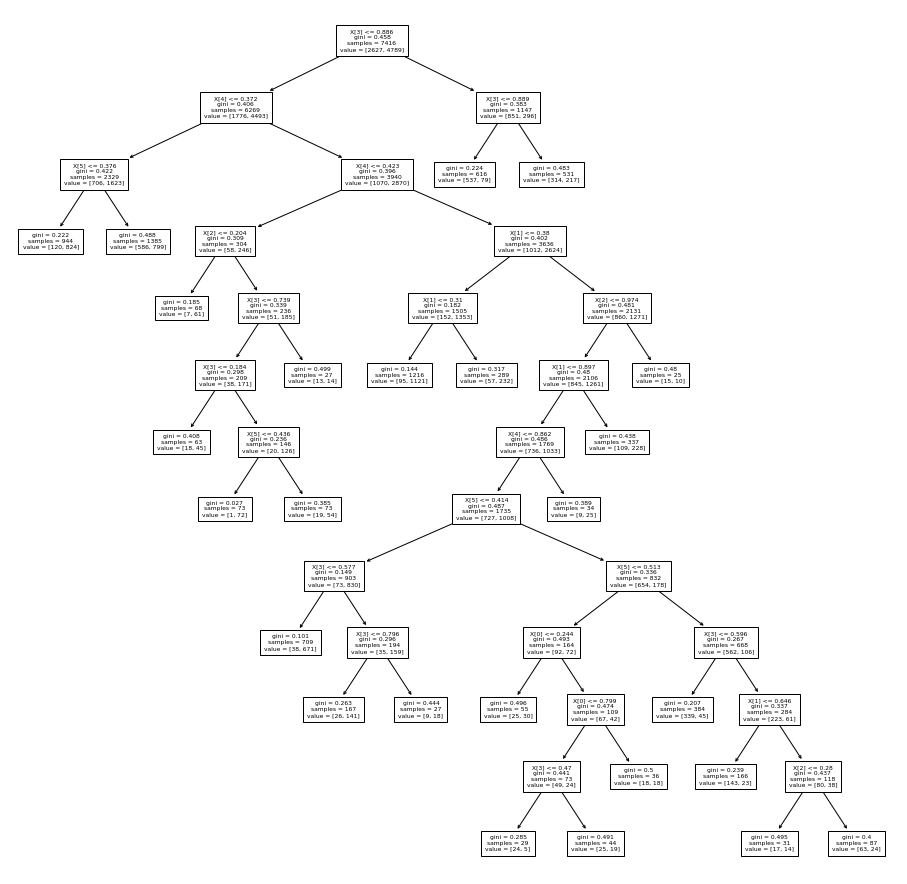

In [20]:
plt.figure(figsize=(16,16))
tree.plot_tree(lst_final[3],fontsize = 6)